2. Prédire l'âge en fonction de l’utilisation (minutes, reels, stories).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./dataset/instagram_users_lifestyle.csv")

df.head()        # voir les premières lignes
df.info()        # types des colonnes
df.describe()    # stats générales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547896 entries, 0 to 1547895
Data columns (total 58 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_id                         1547896 non-null  int64  
 1   app_name                        1547896 non-null  object 
 2   age                             1547896 non-null  int64  
 3   gender                          1547896 non-null  object 
 4   country                         1547896 non-null  object 
 5   urban_rural                     1547896 non-null  object 
 6   income_level                    1547896 non-null  object 
 7   employment_status               1547896 non-null  object 
 8   education_level                 1547896 non-null  object 
 9   relationship_status             1547896 non-null  object 
 10  has_children                    1547896 non-null  object 
 11  exercise_hours_per_week         1547896 non-null  float64
 12  

,user_id,age,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,...,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,notification_response_rate,account_creation_year,average_session_length_minutes,linked_accounts_count,user_engagement_score
count,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,...,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06
mean,7.739485e+05,3.898544e+01,7.143480e+00,6.999384e+00,1.998774e+01,5.499804e+00,2.500084e+01,1.244917e+02,7.950007e+01,8.000105e+03,...,3.762037e+01,3.295203e+01,5.647662e+01,2.160543e+03,2.604942e+03,5.002404e-01,2.018466e+03,2.050971e+01,1.975254e+00,1.644642e+00
std,4.468392e+05,1.529453e+01,3.994556e+00,1.097098e+00,1.183258e+01,2.871232e+00,3.976188e+00,2.020699e+01,1.154874e+01,8.939761e+01,...,2.535788e+01,2.144569e+01,3.534782e+01,3.402016e+03,2.751922e+03,2.887827e-01,4.613253e+00,8.697454e+00,1.352058e+00,1.812684e+00
min,1.000000e+00,1.300000e+01,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,9.000000e+01,6.000000e+01,7.566000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,2.000000e+01,0.000000e+00,2.010000e+03,5.000000e+00,0.000000e+00,6.700000e-01
25%,3.869748e+05,2.600000e+01,4.000000e+00,6.300000e+00,1.000000e+01,3.000000e+00,2.230000e+01,1.070000e+02,7.000000e+01,7.940000e+03,...,1.800000e+01,1.600000e+01,2.900000e+01,5.430000e+02,6.630000e+02,2.500000e-01,2.015000e+03,1.330000e+01,1.000000e+00,1.000000e+00
50%,7.739485e+05,3.900000e+01,6.600000e+00,7.000000e+00,2.000000e+01,5.000000e+00,2.500000e+01,1.240000e+02,7.900000e+01,8.000000e+03,...,3.400000e+01,3.100000e+01,5.400000e+01,1.154000e+03,1.519000e+03,5.000000e-01,2.019000e+03,2.040000e+01,2.000000e+00,1.100000e+00
75%,1.160922e+06,5.200000e+01,9.700000e+00,7.700000e+00,3.000000e+01,8.000000e+00,2.770000e+01,1.420000e+02,9.000000e+01,8.060000e+03,...,5.300000e+01,4.700000e+01,8.000000e+01,2.459000e+03,3.451000e+03,7.500000e-01,2.022000e+03,2.760000e+01,3.000000e+00,1.290000e+00
max,1.547896e+06,6.500000e+01,2.410000e+01,1.000000e+01,4.000000e+01,1.000000e+01,4.500000e+01,1.590000e+02,9.900000e+01,8.473000e+03,...,1.710000e+02,1.380000e+02,2.220000e+02,2.088110e+05,1.000000e+04,1.000000e+00,2.026000e+03,5.200000e+01,5.000000e+00,1.867000e+01


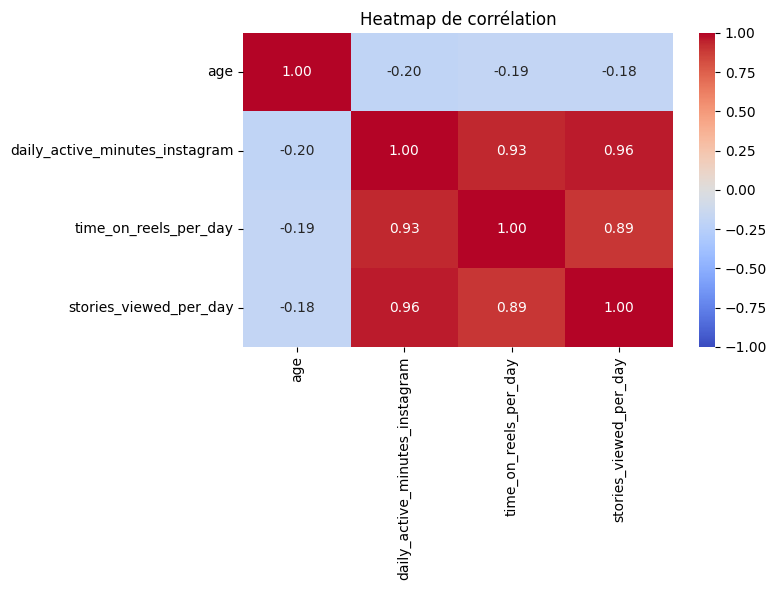

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# 2. Calculer la matrice de corrélation
correlation = df[['age', 'daily_active_minutes_instagram', 'time_on_reels_per_day', 'stories_viewed_per_day']].corr()

# 3. Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation,
    annot=True,        # affiche les valeurs dans les cases
    fmt=".2f",         # arrondi à 2 décimales
    cmap="coolwarm",   # couleurs : bleu = corrélation négative, rouge = positive
    vmin=-1, vmax=1    # échelle de -1 à 1
)
plt.title("Heatmap de corrélation")
plt.tight_layout()
plt.show()

/tmp/ipykernel_18932/331933444.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby("age_group")["daily_active_minutes_instagram"].mean()


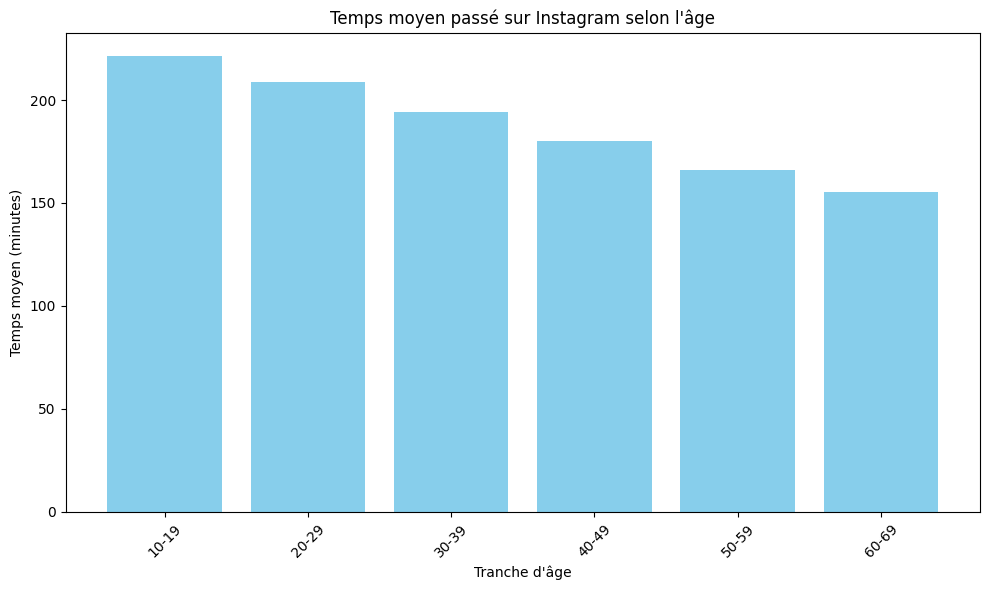

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Définir les tranches d'âge personnalisées (par exemple tous les 10 ans)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # bornes d'âge
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]  # labels lisibles

# Ajouter la colonne des tranches d'âge
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

# Calcul de la moyenne du temps passé par tranche
means = df.groupby("age_group")["daily_active_minutes_instagram"].mean()

# Graphique simple
plt.figure(figsize=(10,6))
plt.bar(means.index.astype(str), means.values, color='skyblue')

plt.xlabel("Tranche d'âge")
plt.ylabel("Temps moyen (minutes)")
plt.title("Temps moyen passé sur Instagram selon l'âge")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_111838/3477725342.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby("age_group")['time_on_reels_per_day'].mean()


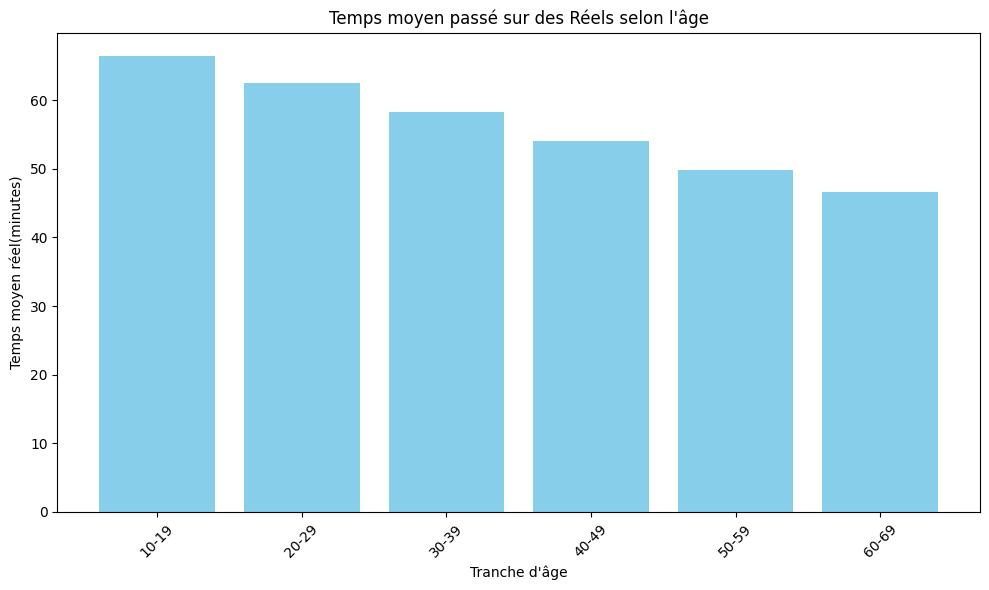

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Définir les tranches d'âge personnalisées (par exemple tous les 10 ans)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # bornes d'âge
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]  # labels lisibles

# Ajouter la colonne des tranches d'âge
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

# Calcul de la moyenne du temps passé par tranche
means = df.groupby("age_group")['time_on_reels_per_day'].mean()

# Graphique simple
plt.figure(figsize=(10,6))
plt.bar(means.index.astype(str), means.values, color='skyblue')

plt.xlabel("Tranche d'âge")
plt.ylabel("Temps moyen réel(minutes)")
plt.title("Temps moyen passé sur des Réels selon l'âge")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MAE : 12.922516905720165
R²  : 0.04025067229340562


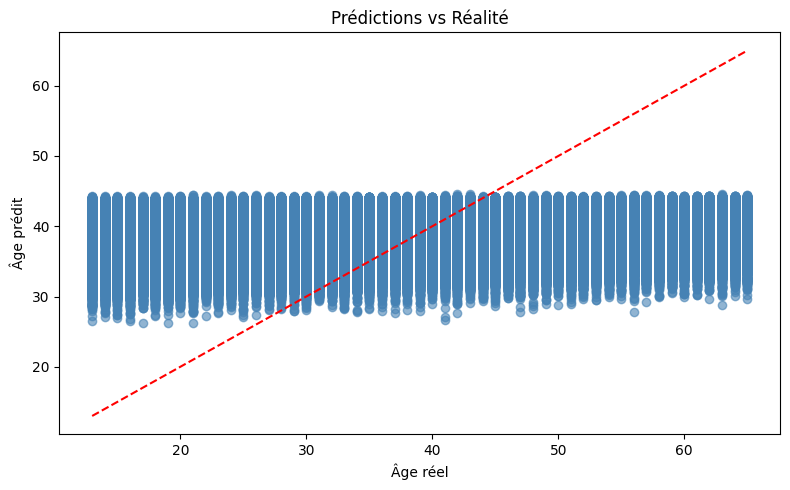

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Définir les variables
X = df[['daily_active_minutes_instagram', 'time_on_reels_per_day', 'stories_viewed_per_day']]  # variables d'entrée (features)
y = df['age']                             # variable à prédire (cible)

# 2. Diviser en données d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# 5. Évaluer le modèle
print("MAE :", mean_absolute_error(y_test, y_pred))   # erreur moyenne en années
print("R²  :", r2_score(y_test, y_pred))              # score global (1 = parfait)



plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='steelblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ligne parfaite
plt.xlabel("Âge réel")
plt.ylabel("Âge prédit")
plt.title("Prédictions vs Réalité")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

       10-20       0.18      0.17      0.17     46922
       20-30       0.21      0.22      0.21     58731
       30-40       0.19      0.19      0.19     58051
       40-50       0.19      0.18      0.18     58288
       50-60       0.22      0.27      0.24     58312
       60-70       0.10      0.06      0.07     29276

    accuracy                           0.19    309580
   macro avg       0.18      0.18      0.18    309580
weighted avg       0.19      0.19      0.19    309580



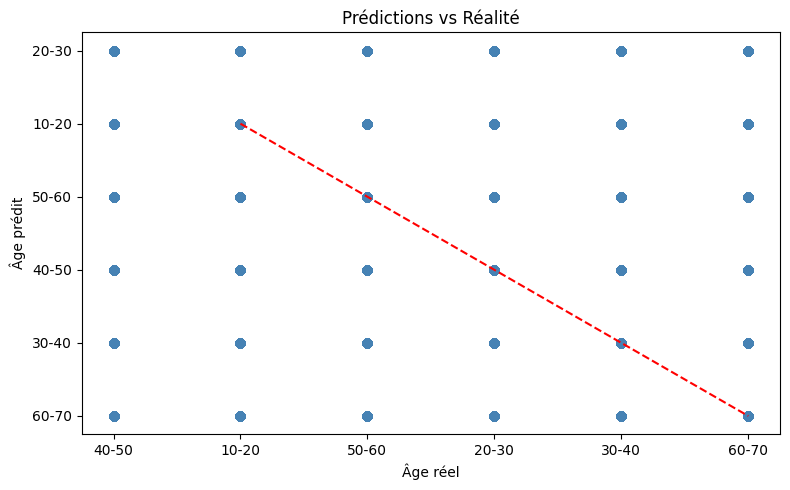

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# 2. Créer les tranches d'âge de 10 en 10
df['tranche_age'] = pd.cut(
    df['age'],
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 100],
    labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80+"]
)

# 3. Définir les variables
X = df[['daily_active_minutes_instagram', 'time_on_reels_per_day', 'stories_viewed_per_day']] # ⚠️ adaptez vos noms de colonnes
y = df['tranche_age']

# 4. Diviser en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entraîner le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Évaluer
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='steelblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ligne parfaite
plt.xlabel("Âge réel")
plt.ylabel("Âge prédit")
plt.title("Prédictions vs Réalité")
plt.tight_layout()
plt.show()

1️⃣ Corrélation Pearson (relation linéaire)

In [16]:
import pandas as pd

# Variables numériques
cols = ['age',
        'daily_active_minutes_instagram',
        'time_on_reels_per_day',
        'stories_viewed_per_day']

corr_matrix = df[cols].corr(method='pearson')
print(corr_matrix['age'])

age                               1.000000
daily_active_minutes_instagram   -0.197867
time_on_reels_per_day            -0.185128
stories_viewed_per_day           -0.181543
Name: age, dtype: float64


Interprétation froide et scientifique

Les corrélations sont négatives → plus on est jeune, plus on utilise Instagram.
Logique comportementale.

La force est autour de 0.18–0.20 →
faible mais réelle.

Ce n’est PAS zéro.
Donc il y a un signal.
Mais il est faible.

2️⃣ Corrélation Spearman (plus robuste)

In [17]:
corr_matrix_s = df[cols].corr(method='spearman')
print(corr_matrix_s['age'])

age                               1.000000
daily_active_minutes_instagram   -0.190251
time_on_reels_per_day            -0.180360
stories_viewed_per_day           -0.181803
Name: age, dtype: float64


Tu viens de démontrer que :

Le temps passé sur Instagram est un indicateur très faible de l’âge.

C’est une vraie conclusion exploitable.

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Variables
X = df[['daily_active_minutes_instagram',
        'time_on_reels_per_day',
        'stories_viewed_per_day']]

y = df['age']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modèle
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Métriques
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE :", rmse)
print("R² :", r2)

MAE : 13.778490655859258
RMSE : 16.445557510519734
R² : -0.15267083615243537


Les 3 variables Instagram ne contiennent pas assez d’information pour prédire l’âge.

Option réalisable ajouter des variables

Par exemple :

Heure d’activité

Fréquence de publication

Type de contenu consommé

Nombre d’abonnés

Nombre de posts

Je vais rajouter la date de création de compte pour rajouter potentiellement de la précision à mon modèle

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Créer account_age
df['account_age'] = 2026 - df['account_creation_year']

# Sélection des variables Instagram + account_age
features = [
    'daily_active_minutes_instagram',
    'time_on_reels_per_day',
    'stories_viewed_per_day',
    'posts_created_per_week',
    'followers_count',
    'following_count',
    'sessions_per_day',
    'likes_given_per_day',
    'comments_written_per_day',
    'account_age'
]

X = df[features]
y = df['age']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modèle RandomForest
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE :", mae)
print("R² :", r2)

# Importance des features
importances = pd.Series(model.feature_importances_, index=X.columns)
print("Top features :")
print(importances.sort_values(ascending=False))

# 🔹 Graphique joli
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='steelblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Âge réel")
plt.ylabel("Âge prédit")
plt.title("Prédictions de l'âge avec compte Instagram + ancienneté du compte")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Créer account_age
df['account_age'] = 2026 - df['account_creation_year']

# Variables Instagram + account_age
features = [
    'daily_active_minutes_instagram',
    'time_on_reels_per_day',
    'stories_viewed_per_day',
    'posts_created_per_week',
    'followers_count',
    'following_count',
    'sessions_per_day',
    'likes_given_per_day',
    'comments_written_per_day',
    'account_age'
]

X = df[features]
y = df['age']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modèle RandomForest
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE :", mae)
print("R² :", r2)

# Importance des features
importances = pd.Series(model.feature_importances_, index=X.columns)
print("Top features :")
print(importances.sort_values(ascending=False))

# 🔹 Graphique avec échantillonnage pour ne pas crasher
sample_size = 100 # 5000 points suffisent pour visualiser
if len(y_test) > sample_size:
    sample_indices = y_test.sample(n=sample_size, random_state=42).index
    y_test_sample = y_test.loc[sample_indices]
    y_pred_sample = pd.Series(y_pred, index=y_test.index).loc[sample_indices]
else:
    y_test_sample = y_test
    y_pred_sample = pd.Series(y_pred, index=y_test.index)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_sample, y=y_pred_sample, alpha=0.4, color='steelblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Âge réel")
plt.ylabel("Âge prédit")
plt.title("Prédictions de l'âge (échantillon 5000) avec compte Instagram + ancienneté du compte")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Créer account_age
df['account_age'] = 2026 - df['account_creation_year']

# Variables Instagram + account_age
features = [
    'daily_active_minutes_instagram',
    'time_on_reels_per_day',
    'stories_viewed_per_day',
    'posts_created_per_week',
    'followers_count',
    'following_count',
    'sessions_per_day',
    'likes_given_per_day',
    'comments_written_per_day',
    'account_age'
]

X = df[features].values
y = df['age'].values

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# RandomForest
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE :", mae)
print("R² :", r2)

# 🔹 Heatmap 2D (densité)
plt.figure(figsize=(8,6))
plt.hist2d(y_test, y_pred, bins=100, cmap='Blues')
plt.colorbar(label='Nombre de points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Âge réel")
plt.ylabel("Âge prédit")
plt.title("Heatmap densité : Âge réel vs Âge prédit")
plt.tight_layout()
plt.show()